In [27]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import requests
import json
from scipy.stats import linregress

In [2]:
# Load CSV Files into Dataframes
games_file = "data/games.csv"
atbats_file = "data/atbats.csv"
player_name_file = "data/player_names.csv"

games_pd = pd.read_csv(games_file)
atbats_pd = pd.read_csv(atbats_file)
player_name_pd = pd.read_csv(player_name_file)

games_atbats_merge_pd = pd.merge(games_pd, atbats_pd, how="left", on=["g_id"])

games_atbats_merge_pd.columns = ['Attendance',
                                 'Final Score',
                                 'Away Team',
                                 'Game Date',
                                 'Elapsed Time',
                                 'Game ID',
                                 'Home Team Score',
                                 'Home Team',
                                 'Game Start Time',
                                 'Umpire 1',
                                 'Umpire 2',
                                 'Umpire 3',
                                 'Umpire HP',
                                 'Venue',
                                 'Weather',
                                 'Wind',
                                 'Delay Time',
                                 'AtBat ID',
                                 'Player ID',
                                 'Event',
                                 'Inning',
                                 'Outs',
                                 'Score of Pitchers Team',
                                 'Pitcher Hand',
                                 'Pitcher ID',
                                 'Batter Stance',
                                 'Top of the Inning'
                                ]
games_atbats_merge_pd.drop(['Umpire 1', 'Umpire 2','Umpire 3','Umpire HP','Outs','Batter Stance'], inplace=True, axis=1, errors='ignore')
# games_atbats_merge_pd.head()

In [3]:
# Load CSV Files into Dataframes
games_file = "data/games.csv"
atbats_file = "data/atbats.csv"
player_name_file = "data/player_names.csv"

games_pd = pd.read_csv(games_file)
atbats_pd = pd.read_csv(atbats_file)
player_name_pd = pd.read_csv(player_name_file)

games_atbats_merge_pd = pd.merge(games_pd, atbats_pd, how="left", on=["g_id"])

games_atbats_merge_pd.columns = ['Attendance',
                                 'Final Score',
                                 'Away Team',
                                 'Game Date',
                                 'Elapsed Time',
                                 'Game ID',
                                 'Home Team Score',
                                 'Home Team',
                                 'Game Start Time',
                                 'Umpire 1',
                                 'Umpire 2',
                                 'Umpire 3',
                                 'Umpire HP',
                                 'Venue',
                                 'Weather',
                                 'Wind',
                                 'Delay Time',
                                 'AtBat ID',
                                 'Player ID',
                                 'Event',
                                 'Inning',
                                 'Outs',
                                 'Score of Pitchers Team',
                                 'Pitcher Hand',
                                 'Pitcher ID',
                                 'Batter Stance',
                                 'Top of the Inning'
                                ]
games_atbats_merge_pd.drop(['Umpire 1', 'Umpire 2','Umpire 3','Umpire HP','Outs','Batter Stance'], inplace=True, axis=1, errors='ignore')
# games_atbats_merge_pd.head(100)

In [4]:
#Merging games_atbats_merge_pd with the player_name_pd
player_name_pd.columns = ['Player ID', 'First Name','Last Name']

In [5]:
# Keala's Player Input Visualization
player_summary_pd = pd.merge(player_name_pd, games_atbats_merge_pd, how="left", on=["Player ID"])
player_summary_pd["Player Name"] = player_summary_pd["First Name"] + " " + player_summary_pd["Last Name"]
player_summary_pd.drop(['First Name', 'Last Name'], inplace=True, axis=1, errors='ignore')

player_stats_pd = player_summary_pd[["Player Name","Event"]]
player_stats_pd_grouped = player_stats_pd.groupby(["Player Name"])['Event'].value_counts()
df1 = pd.DataFrame(player_stats_pd_grouped)
df1.columns = ['Number']
df1

# Resetting the index to the Event
df1 = df1.reset_index(level='Event')

#Pivoting the data to swich the rows and columns
df2 = df1.pivot(columns='Event',values='Number')

# Filling in the NaN values
df3 = df2.fillna(0)
# df3

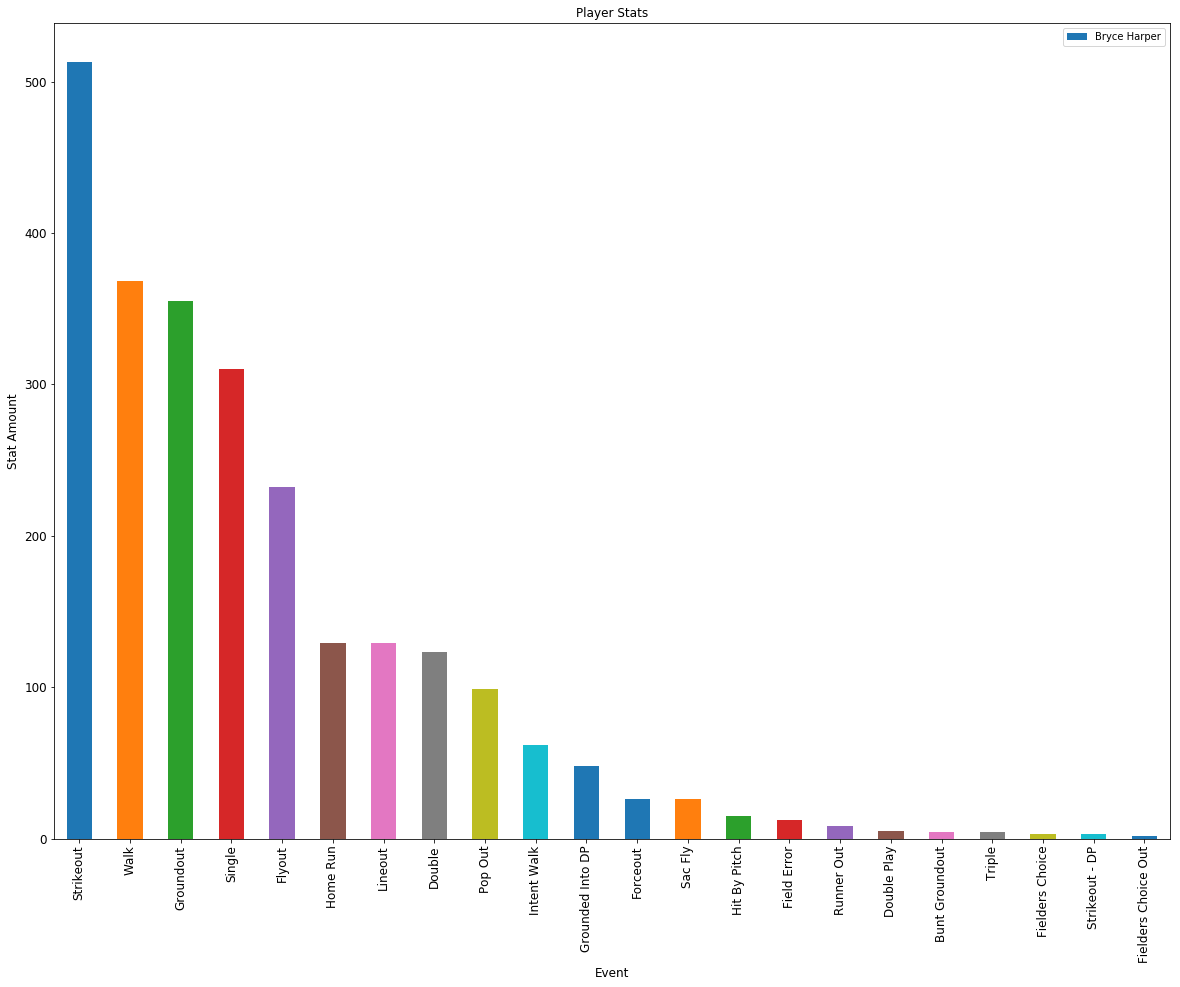

In [6]:
# Plotting the data

# What player do you want to look up?
PlayerName = 'Bryce Harper'

df4 = df1.reset_index()
new_df = df4[df4['Player Name']== PlayerName]
player_info = new_df.plot.bar(x="Event", y="Number", figsize = (20,15), fontsize = 12, title = "Player Stats")
player_info.set_xlabel("Event", fontsize=12)
player_info.set_ylabel("Stat Amount", fontsize=12)
plt.legend([PlayerName])

# Save Figure
plt.savefig("Images/PlayerStats.png")
plt.show()

In [7]:
#Keala's Venue Visualization

# Venue Capacity Dictionary
venue_capacity = {'Wrigley Field':41649, 
                    'Safeco Field':47715,  
                    'Marlins Park':36742,  
                    'Tropicana Field':25000, 
                    'Citizens Bank Park':43035,  
                    'Kauffman Stadium':37903,  
                    'Minute Maid Park':41168,  
                    'Miller Park':41900, 
                    'Comerica Park':41083,  
                    'Nationals Park':41339,  
                    'Great American Ball Park':42319, 
                    'Dodger Stadium':56000,  
                    'Chase Field':48686,  
                    'O.co Coliseum':47170,  
                    'Yankee Stadium':47309,  
                    'Petco Park':40209,  
                    'Coors Field':46897, 
                    'Progressive Field':35041, 
                    'Globe Life Park in Arlington':48114,  
                    'Angel Stadium of Anaheim':45477, 
                    'U.S. Cellular Field':40615,  
                    'Turner Field':49586,  
                    'Oriole Park at Camden Yards':45971, 
                    'AT&T Park':41915, 
                    'PNC Park':38747,  
                    'Target Field':38649,  
                    'Busch Stadium':45494,  
                    'Citi Field':41922, 
                    'Rogers Centre':49282,  
                    'Fenway Park':37755,  
                    'Oakland Coliseum':47170,  
                    'Fort Bragg Field':12500, 
                    'Guaranteed Rate Field':40615,  
                    'SunTrust Park':41084, 
                    'Williamsport Little League Classic':2596,  
                    'Hiram Bithorn Stadium':18264, 
                    'Estadio de Beisbol Monterrey':22061,  
                    'Angel Stadium':45477,  
                    'BB&T Ballpark':10200}

venue_pd = games_atbats_merge_pd[["Attendance","Venue"]]
venue_pd = venue_pd.groupby(["Venue"]).count()

In [8]:
# venue_pd['Percent Attendance'] = ''
venue_pd = venue_pd.reset_index(level = 'Venue')

In [9]:
venue_capacity_df = pd.DataFrame(list(venue_capacity.items()),index=list(range(0,len(venue_capacity))),columns=['Venue','Capacity'])
# venue_capacity_df.head()

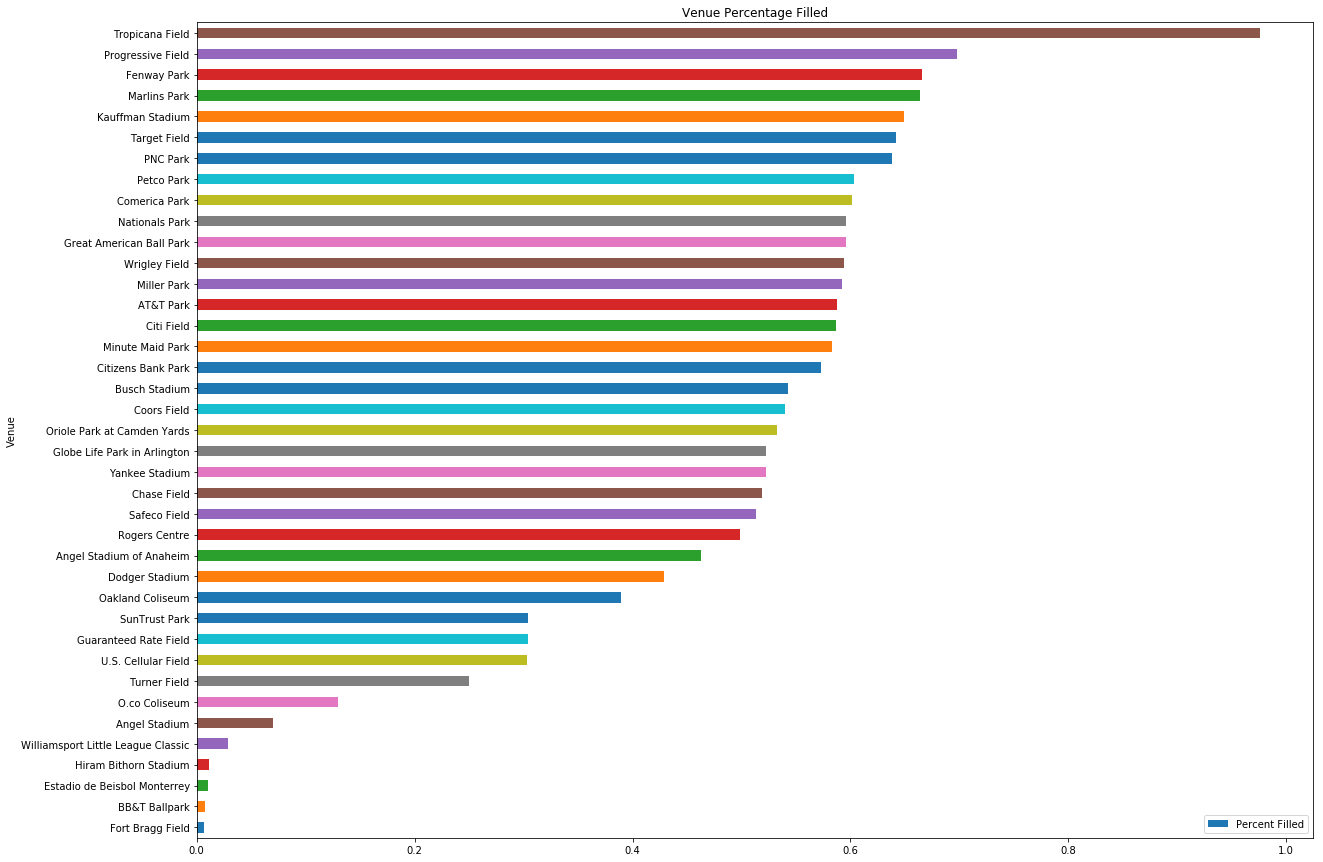

In [10]:
final_venue_pd = pd.merge(venue_pd, venue_capacity_df, how="left", on=["Venue"])
final_venue_pd['Percent Filled'] = final_venue_pd['Attendance']/final_venue_pd['Capacity']
final_venue_pd = final_venue_pd.sort_values(by=['Percent Filled'], ascending=True)
final_venue_pd

# Plotting the venue data - long bar graph
final_venue_pd.plot.barh(x="Venue", y="Percent Filled", title = "Venue Percentage Filled", figsize = (20,15), sort_columns = False)
player_info.set_xlabel("Event", fontsize=14)
player_info.set_ylabel("Percent Filled", fontsize=14)

# Save Figure
plt.savefig("Images/VenuePercentageFilled.png")
plt.show()

In [11]:
# venue_capacity.keys()

In [12]:
# for index, row in venue_pd.iterrows():
    
        
        
#         venue_pd.loc[index,venue]=venue_capacity[venue]
#     break
# venue_pd

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is tryi

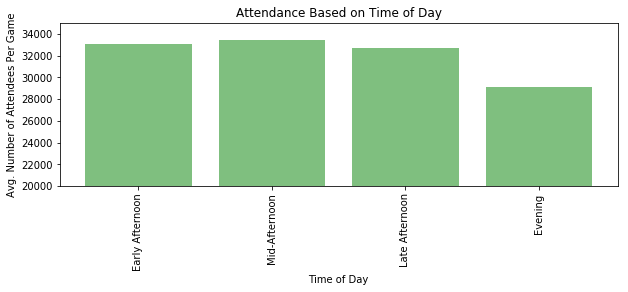

In [13]:
#Kelsey's Time Visualizations - Day of the week, & Time of day

# Pull just the relevant column from the merged dataframe
date_time_pd = games_atbats_merge_pd[["Game ID","Attendance","Game Date", "Game Start Time"]]

# Drop duplicates to not track the same attendance value multiple times
date_time_pd.drop_duplicates(subset ="Game ID", keep = 'first', inplace = True)
date_time_pd.drop_duplicates(subset="Game Start Time", keep = 'first', inplace = True)
date_time_pd.drop_duplicates(subset="Game Date", keep = 'first', inplace = True)

date_time_pd["Days"] = date_time_pd["Game Date"].unique()
# Preview the data set

#date_time_pd.head()
#date_time_pd['Game Date'] = date_time_pd['Game Date'].dt.weekday_name
#date_time_pd.assign(day_of_week = date_time_pd['Game Date'].dt.weekday_name)

# Create lists to hold information based on the dataframe
start_times = []
attendance_time = []
early_afternoon = []
mid_afternoon = []
late_afternoon = []
evening = []
time_attend_sum = []
# Creates a list of time brackets to simplify the plot
times = ["Early Afternoon", "Mid-Afternoon", "Late Afternoon", "Evening"]

# For loop to iterate through each row of the dataframe and append data to the various lists
for index, row in date_time_pd.iterrows():
    
    # Splits the values of the "Game Start Time" dataframe column for simpler conditional statements; appends just
    # the numeric hour to the time of day list
    time_of_day = int(row["Game Start Time"].split(':')[0])
    # Sets the variable to the value in the "Attendance" column for the current row
    time_attendance = row["Attendance"]
    # Appends the start time attendance number for the current row to the attendance list for times
    start_times.append(time_of_day)
    # Appends the attendance number for the current row to the attendance list for times
    attendance_time.append(time_attendance)
    
    # Conditional statement that sorts the dataframe values into the proper list
    if time_of_day == 11 or time_of_day == 12 or time_of_day == 1:
        early_afternoon.append(time_attendance)
    if time_of_day == 2 or time_of_day == 3:
        mid_afternoon.append(time_attendance)
    if time_of_day == 4 or time_of_day == 5 or time_of_day == 6:
        late_afternoon.append(time_attendance)
    if time_of_day == 7 or time_of_day == 8 or time_of_day == 9:
        evening.append(time_attendance)
    
# Calculates the average attendance for each time bracket and appends it to a list for plotting    
time_attend_sum.append(sum(early_afternoon) / len(early_afternoon))
time_attend_sum.append(sum(mid_afternoon) / len(mid_afternoon))
time_attend_sum.append(sum(late_afternoon) / len(late_afternoon))
time_attend_sum.append(sum(evening) / len(evening))
    
#print(len(start_times))
#print(len(attendance_time))

#print(date_time_pd["Game Start Time"].nunique())

# Original graph
'''x_axis_time = np.arange(len(time_attend_sum))
plt.figure(figsize=(10,3))
tick_locations_time = [value+0.4 for value in x_axis_time]
plt.bar(x_axis_time, time_attend_sum, width=0.8, color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations_time, times, rotation="vertical")
#plt.ylim(0, 40000, 500)
plt.title("Attendance Based on Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Avg. Number of Attendees Per Game")
plt.show()'''

# Zoomed in graph for better visualization, looking only at the upper portions of the bar graph
x_axis_time = np.arange(len(time_attend_sum))
# Set size of the graph
plt.figure(figsize=(10,3))
# Generate tick locations to match the x-axis
tick_locations_time = [value+0.4 for value in x_axis_time]
# Generate the graph
plt.bar(x_axis_time, time_attend_sum, width=0.8, color='g', alpha=0.5, align="edge")
# Set the x-ticks for the x-axis
plt.xticks(tick_locations_time, times, rotation="vertical")
# Specify the y-limit; done for better visualization
plt.ylim(20000, 35000, 500)
# Set the title of the graph
plt.title("Attendance Based on Time of Day")
# Set the labels for each axis
plt.xlabel("Time of Day")
plt.ylabel("Avg. Number of Attendees Per Game")
#plt.savefig("../Graphs/time_of_day.png")
# Show the graph
plt.show()


#print(time_attend_sum)

In [14]:
#Jorge's Stats Visualizations - Home scores/Record

In [15]:
#Jorge's Stat Visualizations - Average Homeruns at home vs Attendance

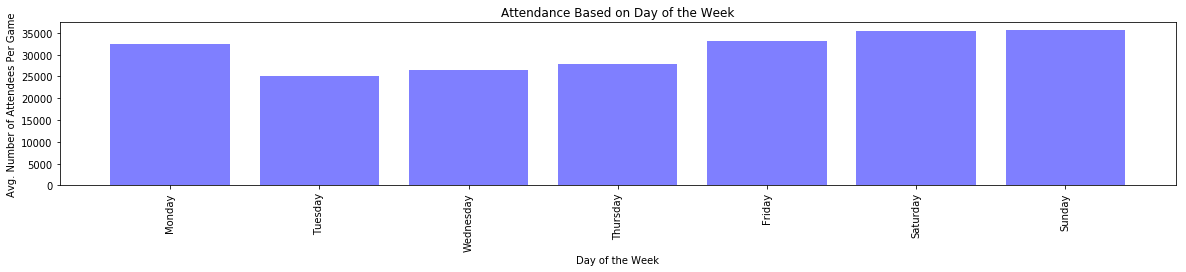

In [16]:
# Create lists to hold various types of information from the dataframe
day_of_week = []
attendance_day = []
days_of_week = [0, 1, 2, 3, 4, 5, 6]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
mon_attend = []
tues_attend = []
weds_attend = []
thurs_attend = []
fri_attend = []
sat_attend = []
sun_attend = []

# For loop that iterates through each row of the dataframe
for index, row in date_time_pd.iterrows():
    dt = row["Days"]
    day_attendance = row["Attendance"]
    year, month, day = (int(x) for x in dt.split('-'))
    answer = datetime.date(year, month, day).weekday()
    #day_name = calendar.day_name[answer.weekday()] 
    day_of_week.append(answer)
    attendance_day.append(day_attendance)
    
    if answer == 0:
        mon_attend.append(day_attendance)
    elif answer == 1:
        tues_attend.append(day_attendance)
    elif answer == 2:
        weds_attend.append(day_attendance)
    elif answer == 3:
        thurs_attend.append(day_attendance)
    elif answer == 4:
        fri_attend.append(day_attendance)
    elif answer == 5:
        sat_attend.append(day_attendance)
    elif answer == 6:
        sun_attend.append(day_attendance)
        
attend_sum = []
mon = sum(mon_attend) / len(mon_attend)
attend_sum.append(mon)
tues = sum(tues_attend) / len(tues_attend)
attend_sum.append(tues)
weds = sum(weds_attend) / len(weds_attend)
attend_sum.append(weds)
thur = sum(thurs_attend) / len(thurs_attend)
attend_sum.append(thur)
fri = sum(fri_attend) / len(fri_attend)
attend_sum.append(fri)
sat = sum(sat_attend) / len(sat_attend)
attend_sum.append(sat)
sun = sum(sun_attend) / len(sun_attend)
attend_sum.append(sun)

'''x_axis_day = np.arange(0, 7, 1)
tick_locations = [value+0.4 for value in days_of_week]
plt.figure(figsize=(20,3))
plt.bar(x_axis_day, day_attendance, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, days, rotation="vertical")
plt.title("Attendance Based on Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Avg. Number of Attendees Per Game")
plt.show()'''


x_axis_day = np.arange(len(attend_sum))
tick_locations_day = [value+0.4 for value in x_axis_day]
plt.figure(figsize=(20,3))
plt.bar(x_axis_day, attend_sum, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations_day, days, rotation="vertical")
plt.title("Attendance Based on Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Avg. Number of Attendees Per Game")
plt.show()

#print(day_of_week)
#print(len(attendance_day))

#print(len(mon_attend))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


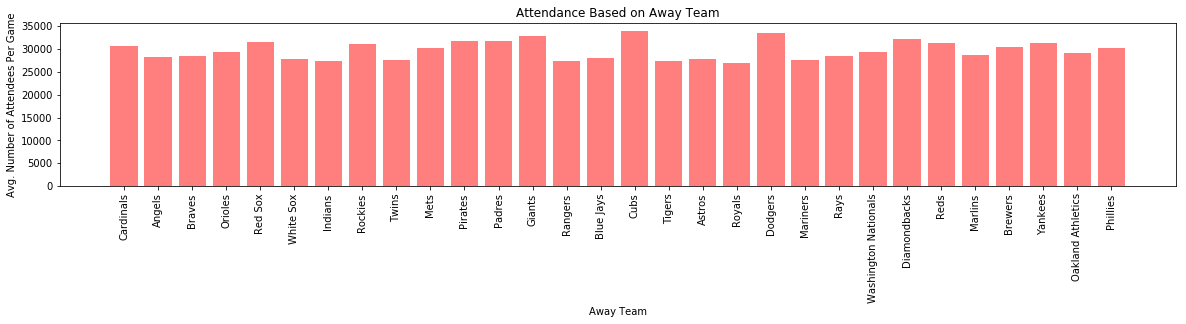

In [17]:
#Kelsey's Home Team vs Visiting team Visualization

# Create a dictionary of empty lists to hold the attendance values for each team
away_teams = {"sln_away": [], "ana_away": [], "atl_away": [], "bal_away": [],
              "bos_away": [], "cha_away": [], "cle_away": [], "col_away": [],
              "min_away": [], "nyn_away": [], "pit_away": [], "sdn_away": [],
              "sfn_away": [], "tex_away": [], "tor_away": [], "chn_away": [],
              "det_away": [], "hou_away": [], "kca_away": [], "lan_away": [],
              "sea_away": [], "tba_away": [], "was_away": [], "ari_away": [],
              "cin_away": [], "mia_away": [], "mil_away": [], "nya_away": [],
              "oak_away": [], "phi_away": []
    
}

away_teams_list = ["sln", "ana", "atl", "bal", "bos",
        "cha", "cle", "col", "min", "nyn",
        "pit", "sdn", "sfn", "tex", "tor",
        "chn", "det", "hou", "kca", "lan",
        "sea", "tba", "was", "ari", "cin",
        "mia", "mil", "nya", "oak", "phi"]

away_teams_full = ["Cardinals", "Angels", "Braves", "Orioles", "Red Sox", 
                   "White Sox", "Indians", "Rockies", "Twins", "Mets",
                  "Pirates", "Padres", "Giants", "Rangers", "Blue Jays",
                  "Cubs", "Tigers", "Astros", "Royals", "Dodgers",
                  "Mariners", "Rays", "Washington Nationals", "Diamondbacks", "Reds",
                  "Marlins", "Brewers", "Yankees", "Oakland Athletics", "Phillies"]

# From the original full dataframe, obtain just the relevant columns
away_team_pd = games_atbats_merge_pd[["Game ID","Attendance","Away Team", "Home Team"]]
# Drop duplicate game IDs so the attendance for one game is not counted multiple times
away_team_pd.drop_duplicates(subset ="Game ID", keep = 'first', inplace = True)
# Preview the dataframe
# away_team_pd.head()

# try a for statement for each row in the dataframe, have an if statement that will search for the team name
# then append the attendance of the game to the team's list
for index, row in away_team_pd.iterrows():
    team = row["Away Team"]
    attendance = row["Attendance"]
    if team == "sln":
        away_teams["sln_away"].append(attendance) 
    elif team == "ana":
        away_teams["ana_away"].append(attendance)  
    elif team == "atl":
        away_teams["atl_away"].append(attendance)
    elif team == "bal":
        away_teams["bal_away"].append(attendance) 
    elif team == "bos":
        away_teams["bos_away"].append(attendance)
    elif team == "cha":
        away_teams["cha_away"].append(attendance) 
    elif team == "cle":
        away_teams["cle_away"].append(attendance)  
    elif team == "col":
        away_teams["col_away"].append(attendance) 
    elif team == "col":
        away_teams["cle_away"].append(attendance)
    elif team == "min":
        away_teams["min_away"].append(attendance)
    elif team == "nyn":
        away_teams["nyn_away"].append(attendance)
    elif team == "pit":
        away_teams["pit_away"].append(attendance)
    elif team == "sdn":
        away_teams["sdn_away"].append(attendance)
    elif team == "sfn":
        away_teams["sfn_away"].append(attendance)
    elif team == "tex":
        away_teams["tex_away"].append(attendance)
    elif team == "tor":
        away_teams["tor_away"].append(attendance) 
    elif team == "chn":
        away_teams["chn_away"].append(attendance)
    elif team == "det":
        away_teams["det_away"].append(attendance)
    elif team == "hou":
        away_teams["hou_away"].append(attendance)
    elif team == "kca":
        away_teams["kca_away"].append(attendance)
    elif team == "lan":
        away_teams["lan_away"].append(attendance)
    elif team == "sea":
        away_teams["sea_away"].append(attendance)
    elif team == "tba":
        away_teams["tba_away"].append(attendance)
    elif team == "was":
        away_teams["was_away"].append(attendance)
    elif team == "ari":
        away_teams["ari_away"].append(attendance)
    elif team == "cin":
        away_teams["cin_away"].append(attendance)
    elif team == "mia":
        away_teams["mia_away"].append(attendance)
    elif team == "mil":
        away_teams["mil_away"].append(attendance)
    elif team == "nya":
        away_teams["nya_away"].append(attendance)
    elif team == "oak":
        away_teams["oak_away"].append(attendance)
    elif team == "phi":
        away_teams["phi_away"].append(attendance)

        
attendances_away = []        
sln_attend = sum(away_teams["sln_away"]) / len(away_teams["sln_away"])
attendances_away.append(sln_attend)
ana_attend = sum(away_teams["ana_away"]) / len(away_teams["ana_away"])
attendances_away.append(ana_attend)
atl_attend = sum(away_teams["atl_away"]) / len(away_teams["atl_away"])
attendances_away.append(atl_attend)
bal_attend = sum(away_teams["bal_away"]) / len(away_teams["bal_away"])
attendances_away.append(bal_attend)
bos_attend = sum(away_teams["bos_away"]) / len(away_teams["bos_away"])
attendances_away.append(bos_attend)
cha_attend = sum(away_teams["cha_away"]) / len(away_teams["cha_away"])
attendances_away.append(cha_attend)
cle_attend = sum(away_teams["cle_away"]) / len(away_teams["cle_away"])
attendances_away.append(cle_attend)
col_attend = sum(away_teams["col_away"]) / len(away_teams["col_away"])
attendances_away.append(col_attend)
min_attend = sum(away_teams["min_away"]) / len(away_teams["min_away"])
attendances_away.append(min_attend)
nyn_attend = sum(away_teams["nyn_away"]) / len(away_teams["nyn_away"])
attendances_away.append(nyn_attend)
pit_attend = sum(away_teams["pit_away"]) / len(away_teams["pit_away"])
attendances_away.append(pit_attend)
sdn_attend = sum(away_teams["sdn_away"]) / len(away_teams["sdn_away"])
attendances_away.append(sdn_attend)
sfn_attend = sum(away_teams["sfn_away"]) / len(away_teams["sfn_away"])
attendances_away.append(sfn_attend)
tex_attend = sum(away_teams["tex_away"]) / len(away_teams["tex_away"])
attendances_away.append(tex_attend)
tor_attend = sum(away_teams["tor_away"]) / len(away_teams["tor_away"])
attendances_away.append(tor_attend)
chn_attend = sum(away_teams["chn_away"]) / len(away_teams["chn_away"])
attendances_away.append(chn_attend)
det_attend = sum(away_teams["det_away"]) / len(away_teams["det_away"])
attendances_away.append(det_attend)
hou_attend = sum(away_teams["hou_away"]) / len(away_teams["hou_away"])
attendances_away.append(hou_attend)
kca_attend = sum(away_teams["kca_away"]) / len(away_teams["kca_away"])
attendances_away.append(kca_attend)
lan_attend = sum(away_teams["lan_away"]) / len(away_teams["lan_away"])
attendances_away.append(lan_attend)
sea_attend = sum(away_teams["sea_away"]) / len(away_teams["sea_away"])
attendances_away.append(sea_attend)
tba_attend = sum(away_teams["tba_away"]) / len(away_teams["tba_away"])
attendances_away.append(tba_attend)
was_attend = sum(away_teams["was_away"]) / len(away_teams["was_away"])
attendances_away.append(was_attend)
ari_attend = sum(away_teams["ari_away"]) / len(away_teams["ari_away"])
attendances_away.append(ari_attend)
cin_attend = sum(away_teams["cin_away"]) / len(away_teams["cin_away"])
attendances_away.append(cin_attend)
mia_attend = sum(away_teams["mia_away"]) / len(away_teams["mia_away"])
attendances_away.append(mia_attend)
mil_attend = sum(away_teams["mil_away"]) / len(away_teams["mil_away"])
attendances_away.append(mil_attend)
nya_attend = sum(away_teams["nya_away"]) / len(away_teams["nya_away"])
attendances_away.append(nya_attend)
oak_attend = sum(away_teams["oak_away"]) / len(away_teams["oak_away"])
attendances_away.append(oak_attend)
phi_attend = sum(away_teams["phi_away"]) / len(away_teams["phi_away"])
attendances_away.append(phi_attend)


#print(away_team_pd["Away Team"].unique())
#print(len(attendances_away))

x_axis = np.arange(len(away_teams_list))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, attendances_away, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, away_teams_full, rotation="vertical")
plt.title("Attendance Based on Away Team")
plt.xlabel("Away Team")
plt.ylabel("Avg. Number of Attendees Per Game")
plt.show()

In [31]:
#Weather Conditions
games_pd.drop(['away_final_score',
               'away_team',
               'date','elapsed_time',
               'g_id','home_final_score',
               'home_team',
               'start_time',
               'umpire_1B',
               'umpire_2B',
               'umpire_3B',
               'umpire_HP',
               'venue_name',
               'wind',
               'delay'], inplace=True, axis=1, errors='ignore')

games_pd["Temperature"] =""
games_pd["Weather Condition"]=""

for index, row in games_pd.iterrows():
    
    temperature = int(row["weather"].split('degrees, ')[0])
    weather_condition = (row["weather"].split('degrees, ')[1])
    if weather_condition == "dome":
        weather_condition = "roof closed"
    games_pd.loc[index,"Temperature"] = temperature
    games_pd.loc[index,"Weather Condition"] = weather_condition
games_pd


#Binning the temperature data
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120]
labels = ["0's","10's","20's","30's","40's","50's","60's","70's","80's","90's","100's","110's"]
games_pd['Temp Bin'] = pd.cut(games_pd['Temperature'], bins=bins, labels=labels, right=False)
games_pd

,attendance,weather,Temperature,Weather Condition,Temp Bin
0,35055,"44 degrees, clear",44,clear,40's
1,45909,"54 degrees, cloudy",54,cloudy,50's
2,36969,"80 degrees, partly cloudy",80,partly cloudy,80's
3,31042,"72 degrees, dome",72,roof closed,70's
4,45549,"71 degrees, partly cloudy",71,partly cloudy,70's
5,40085,"59 degrees, drizzle",59,drizzle,50's
6,43753,"79 degrees, partly cloudy",79,partly cloudy,70's
7,46032,"70 degrees, roof closed",70,roof closed,70's
8,45030,"52 degrees, partly cloudy",52,partly cloudy,50's
9,42295,"76 degrees, sunny",76,sunny,70's


In [32]:
temp_pd = games_pd.groupby(["Temp Bin"]).sum()
temp2_pd = temp_pd.reset_index()
temp2_pd

,Temp Bin,attendance,Temperature
0,0's,0,0
1,10's,0,0
2,20's,66632,54
3,30's,981863,1406
4,40's,5703645,9508
5,50's,18699698,36123
6,60's,63748514,135172
7,70's,110660157,287148
8,80's,73115792,198292
9,90's,15732286,45762


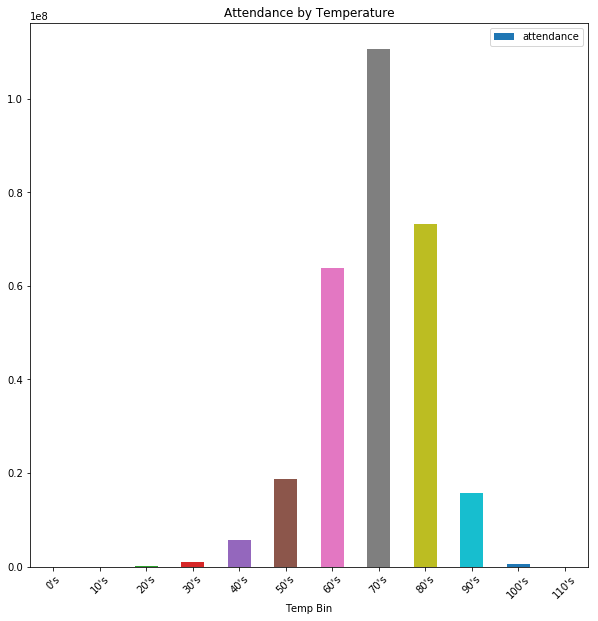

In [33]:
# Plotting Temp Chart
temp2_pd.plot.bar("Temp Bin","attendance", rot = 45, figsize=(10,10), title="Attendance by Temperature")

# Save Figure
plt.savefig("Images/AttendanceByTemperature.png")
plt.show()

In [38]:


count_df = games_pd.groupby(['Weather Condition']).count()
sum_df = games_pd.groupby(['Weather Condition']).sum()
weather_pd = pd.merge(count_df, sum_df, how="left", on=["Weather Condition"])
weather_pd.drop(['weather', 'Temperature_x','Temperature_y'], inplace=True, axis=1, errors='ignore')
weather_pd.columns=["Game Count","Attendance Sum","Average Attendance"]
weather_pd["Average Attendance"] = weather_pd["Attendance Sum"]/weather_pd["Game Count"]
conditions_pd=weather_pd.reset_index()
conditions_pd



,Weather Condition,Game Count,Attendance Sum,Average Attendance
0,clear,1881,1881,1.0
1,cloudy,1704,1704,1.0
2,drizzle,68,68,1.0
3,overcast,641,641,1.0
4,partly cloudy,2989,2989,1.0
5,rain,57,57,1.0
6,roof closed,1407,1407,1.0
7,snow,1,1,1.0
8,sunny,970,970,1.0


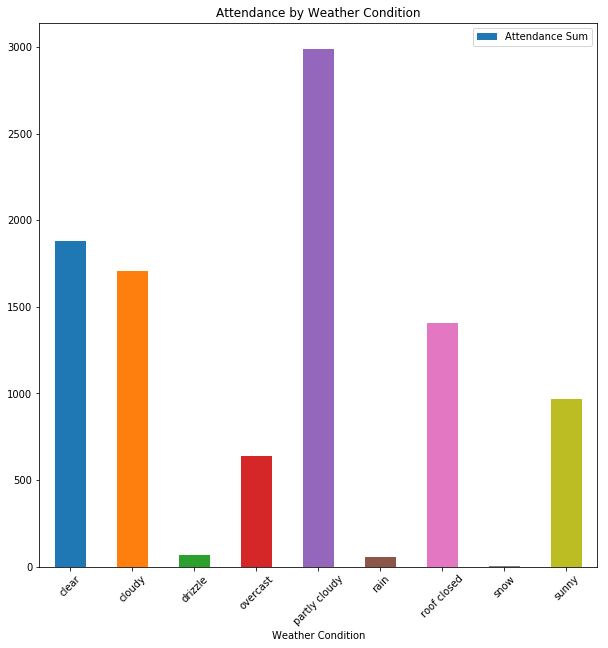

In [39]:
conditions_pd.plot.bar("Weather Condition","Attendance Sum", rot = 45, figsize=(10,10), title="Attendance by Weather Condition")

# Save Figure
plt.savefig("Images/AttendanceByWeatherCondition.png")
plt.show()

In [40]:
#Jorge's Stats Visualizations - Home scores/Record
### Get Home ABs
dfHomeAB  = games_atbats_merge_pd.loc[games_atbats_merge_pd['Top of the Inning'] == False, :] #Home ABs
dfHomeAB = dfHomeAB[['Game Date','Attendance','Event', 'Final Score', 'Away Team', 'Game ID', 'Home Team Score', 'Home Team', 'Venue']]
dfAwayAB  = games_atbats_merge_pd.loc[games_atbats_merge_pd['Top of the Inning'] == True, :] #Away Abs
dfAwayAB = dfAwayAB[['Game Date','Attendance','Event', 'Final Score', 'Away Team', 'Game ID', 'Home Team Score', 'Home Team', 'Venue']]
dfAwayAB.head()

,Game Date,Attendance,Event,Final Score,Away Team,Game ID,Home Team Score,Home Team,Venue
0,2015-04-05,35055,Groundout,3,sln,201500001,0,chn,Wrigley Field
1,2015-04-05,35055,Double,3,sln,201500001,0,chn,Wrigley Field
2,2015-04-05,35055,Single,3,sln,201500001,0,chn,Wrigley Field
3,2015-04-05,35055,Strikeout,3,sln,201500001,0,chn,Wrigley Field
4,2015-04-05,35055,Strikeout,3,sln,201500001,0,chn,Wrigley Field


In [41]:
### Stadium Capacity
dictParkCapacity = {'Wrigley Field':41649, 
                    'Safeco Field':47715,  
                    'Marlins Park':36742,  
                    'Tropicana Field':25000, 
                    'Citizens Bank Park':43035,  
                    'Kauffman Stadium':37903,  
                    'Minute Maid Park':41168,  
                    'Miller Park':41900, 
                    'Comerica Park':41083,  
                    'Nationals Park':41339,  
                    'Great American Ball Park':42319, 
                    'Dodger Stadium':56000,  
                    'Chase Field':48686,  
                    'O.co Coliseum':47170,  
                    'Yankee Stadium':47309,  
                    'Petco Park':40209,  
                    'Coors Field':46897, 
                    'Progressive Field':35041, 
                    'Globe Life Park in Arlington':48114,  
                    'Angel Stadium of Anaheim':45477, 
                    'U.S. Cellular Field':40615,  
                    'Turner Field':49586,  
                    'Oriole Park at Camden Yards':45971, 
                    'AT&T Park':41915, 
                    'PNC Park':38747,  
                    'Target Field':38649,  
                    'Busch Stadium':45494,  
                    'Citi Field':41922, 
                    'Rogers Centre':49282,  
                    'Fenway Park':37755,  
                    'Oakland Coliseum':47170,  
                    'Fort Bragg Field':12500, 
                    'Guaranteed Rate Field':40615,  
                    'SunTrust Park':41084, 
                    'Williamsport Little League Classic':2596,  
                    'Hiram Bithorn Stadium':18264, 
                    'Estadio de Beisbol Monterrey':22061,  
                    'Angel Stadium':45477,  
                    'BB&T Ballpark':10200}

In [42]:
grpHome = dfHomeAB.groupby('Game ID')
#### Merge single home game rows 
gDate = grpHome['Game Date'].max()
gHomeAttend = grpHome['Attendance'].mean()
gAwayScore = grpHome['Final Score'].mean()
gHomeScore = grpHome['Home Team Score'].mean()
gHomeTeam = grpHome['Home Team'].max() 
gVenue = grpHome['Venue'].max() 
#### Create home game stats DF
pdHomeStats = pd.DataFrame({"Attendance":gHomeAttend,"Date":gDate,"Away Score":gAwayScore,"Home Score":gHomeScore,"Team":gHomeTeam,"Venue":gVenue})
pdHomeStats['Game Result'] = np.where(pdHomeStats['Home Score'] > pdHomeStats['Away Score'], 'W','L')
pdHomeStats['Percent Capacity'] = "" 
pdHomeStats['Year'] = ""
pdHomeStats['Month'] = ""
for index, row in pdHomeStats.iterrows():
    gameAtt = row['Attendance']
    parkCap = dictParkCapacity[row['Venue']]
    pdHomeStats.loc[index,'Percent Capacity'] = float(gameAtt/parkCap)
    gameDate = row['Date'].split('-')
    pdHomeStats.loc[index,'Year'] = gameDate[0]
    pdHomeStats.loc[index,'Month'] = gameDate[1]
pdHomeStats.head()



,Attendance,Date,Away Score,Home Score,Team,Venue,Game Result,Percent Capacity,Year,Month
Game ID,,,,,,,,,,
201500001,35055,2015-04-05,3,0,chn,Wrigley Field,L,0.841677,2015,04
201500002,45909,2015-04-06,1,4,sea,Safeco Field,W,0.96215,2015,04
201500003,36969,2015-04-06,2,1,mia,Marlins Park,L,1.00618,2015,04
201500004,31042,2015-04-06,6,2,tba,Tropicana Field,L,1.24168,2015,04
201500005,45549,2015-04-06,8,0,phi,Citizens Bank Park,L,1.05842,2015,04


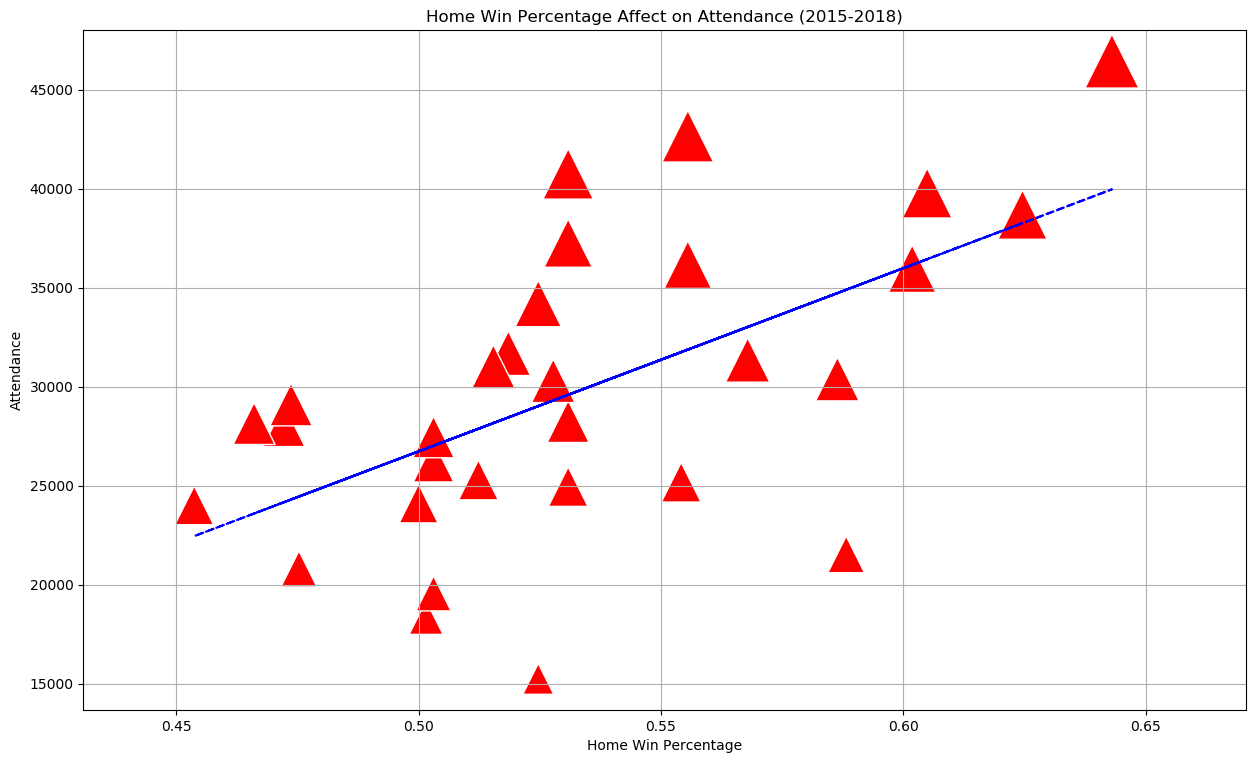

In [43]:
teamStats = pdHomeStats.groupby(['Team'])
teamAttendTotal = teamStats['Attendance'].sum()/10000
teamAttendPer = teamStats['Attendance'].mean()
teamWinPercent = teamStats['Game Result'].value_counts(normalize=True,sort=False).unstack().reset_index()['W']
plt.figure(figsize=(15,9), dpi=100)
plt.scatter(x=teamWinPercent,y=teamAttendPer,marker="^", c='#FF0000', edgecolors='#FFFFFF',s=teamAttendTotal)
# Set line
(slope, intercept, _, _, _) = linregress(teamWinPercent, teamAttendPer)
fit = slope * teamWinPercent + intercept
plt.plot(teamWinPercent, fit, 'b--')
plt.grid()
plt.title("Home Win Percentage Affect on Attendance (2015-2018)")
plt.xlabel("Home Win Percentage")
plt.ylabel("Attendance")
plt.savefig("Home Wins Affect on Attendance.png")

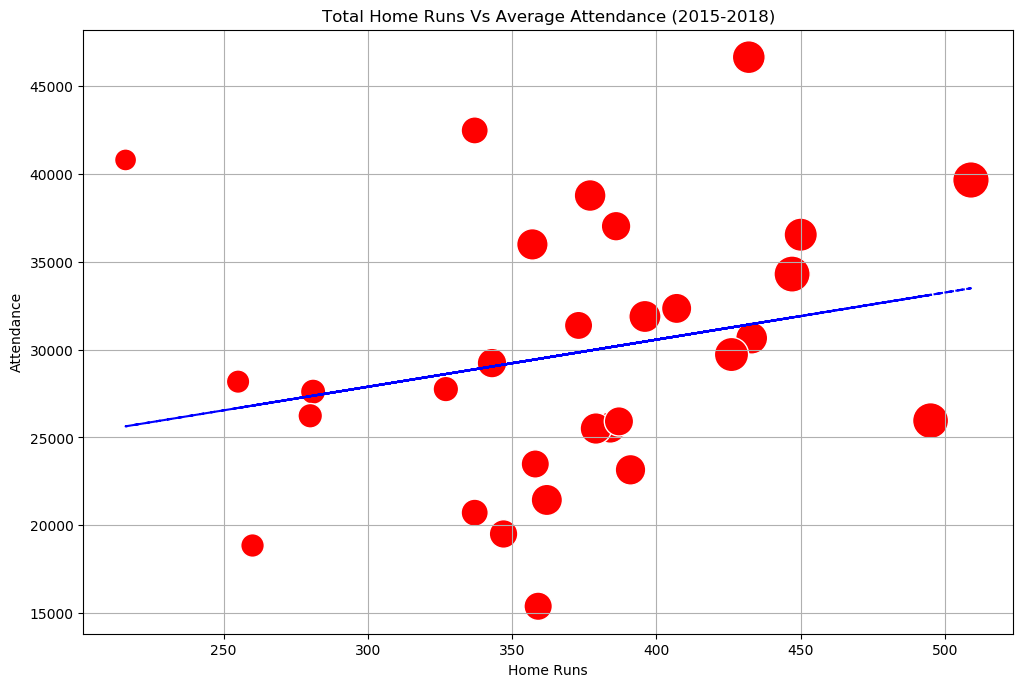

In [44]:
#Jorge's Stat Visualizations - Average Homeruns at home vs Attendance
homeRuns = dfHomeAB.loc[dfHomeAB['Event']=="Home Run",:]
homeRuns['Event'].sum()
teamHomeRuns = homeRuns.groupby(['Home Team'])
teamHRCount = teamHomeRuns['Event'].count()
totalAttendance = teamHomeRuns['Attendance'].mean()
totalRunsScored = teamHomeRuns['Home Team Score'].sum()*.2
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(x=teamHRCount,y=totalAttendance,c='red', edgecolors='white',s=totalRunsScored)
(slope, intercept, _, _, _) = linregress(teamHRCount, totalAttendance)
fit = slope * teamHRCount + intercept
plt.plot(teamHRCount, fit, 'b--')
plt.grid()
plt.title("Total Home Runs Vs Average Attendance (2015-2018)")
plt.xlabel("Home Runs")
plt.ylabel("Attendance")
plt.savefig("Total Home Runs Vs Average Attendance.png")